# Author: Krishnasai Paleti

**Dataset Dictionary**

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Step 1: Data Ingestion

- Here I have used google colab notebook. The data is on the drive and is loaded into a pandas dataframe through google drive.

- After the Dataset is loaded, we analyse the datatypes and the dataset hollistically


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

In [ ]:
drive_path= ""

In [ ]:
data_f = pd.read_csv(drive_path)

In [ ]:
data_f.head(5)

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [ ]:
data_f.shape

(6362620, 11)

In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### **Analysing Datatypes:**

- As listed in the cell above, most of the attributes are of 64 bit precision. This is not a huge point to focus on, but given the dataset has around 6 million samples across 10 columns, the size will be significant when training bulky or large models. Hence a primary step is to convert the 64 bit precision to 32 bit precision with precision set to 2 decimal places to avoid manipulation of data.

- Next is to change attribute "type" from an object datatype to a category datatype as catrgory helps with repitition.

- Categories are really a form of dynamic enumeration. They are most useful if the range of possible values is fixed and finite.




In [ ]:
data_f.describe()


step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [ ]:
data_f['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Note: Class imbalance. Lookup ways to handle imbalanced data.

In [ ]:
data_f['isFlaggedFraud'].value_counts()


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Note: Yikes!!!...way too imbalanced.

In [ ]:
data_f['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

## Dataset info
- On performing some standard statistical analysis on the dataset, we can observe that the dataset target attribute, AKA the attribute the model needs to predict has class imbalance.


--------------------------------------------------------------------------------------------------------------------------------------------------------------


# **Step 1: Data Ingestion - Memory Efficient and Data Cleaning**

In [ ]:
dtypes={
    'step':'int32',
    'type':'category',
    'amount':'float32',
    'oldbalanceOrg':'float32',
    'newbalanceOrig':'float32',
    'oldbalanceDest':'float32',
    'newbalanceDest':'float32',
    'isFraud':'int32',
    'isFlaggedFraud':'int32',
} # since this is a large dataset, a 32 bit precision helps with memory and speed.

In [ ]:
pd.set_option('display.precision', 2) # ensures the value is NOT rounded.

In [ ]:
df = pd.read_csv(drive_path,dtype=dtypes)

In [ ]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.shape)

(6362620, 11)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int32   
 1   type            category
 2   amount          float32 
 3   nameOrig        object  
 4   oldbalanceOrg   float32 
 5   newbalanceOrig  float32 
 6   nameDest        object  
 7   oldbalanceDest  float32 
 8   newbalanceDest  float32 
 9   isFraud         int32   
 10  isFlaggedFraud  int32   
dtypes: category(1), float32(5), int32(3), object(2)
memory usage: 297.3+ MB
None


- As mentioned, having 32 bit precision helps with speed and memory

In [ ]:
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
print(df.iloc[0])

step                        1
type                  PAYMENT
amount                9839.64
nameOrig          C1231006815
oldbalanceOrg        170136.0
newbalanceOrig      160296.36
nameDest          M1979787155
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
Name: 0, dtype: object


In [ ]:
df.isnull().sum() # checks NULL value count

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- No NULL values are present in the dataset

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Note: everything checks out fine pre dtype change and post dtype change.

Dataframe looks clean.

# **Step 2: Feature Engineering:**

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.00e+00  2.24e-02      -1.01e-02       -1.03e-02   
amount          2.24e-02  1.00e+00      -2.76e-03       -7.86e-03   
oldbalanceOrg  -1.01e-02 -2.76e-03       1.00e+00        9.99e-01   
newbalanceOrig -1.03e-02 -7.86e-03       9.99e-01        1.00e+00   
oldbalanceDest  2.77e-02  2.94e-01       6.62e-02        6.78e-02   
newbalanceDest  2.59e-02  4.59e-01       4.20e-02        4.18e-02   
isFraud         3.16e-02  7.67e-02       1.02e-02       -8.15e-03   
isFlaggedFraud  3.28e-03  1.23e-02       3.83e-03        3.78e-03   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  2.77e-02        2.59e-02  3.16e-02        3.28e-03  
amount                2.94e-01        4.59e-01  7.67e-02        1.23e-02  
oldbalanceOrg         6.62e-02        4.20e-02  1.02e-02        3.83e-03  
newbalanceOrig        6.78e-02        4.18e-02 -8.15e-03        3.78e-03  
oldbalanceDest        1.00e+00        9.77e-01 -5.89e-03       -5.13e-04  
newbalanceDest        9.77e-01        1.00e+00  5.35e-04       -5.29e-04  
isFraud              -5.89e-03        5.35e-04  1.00e+00        4.41e-02  
isFlaggedFraud       -5.13e-04       -5.29e-04  4.41e-02        1.00e+00

<ipython-input-22-a26b2e117bc9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() )


<Axes: >

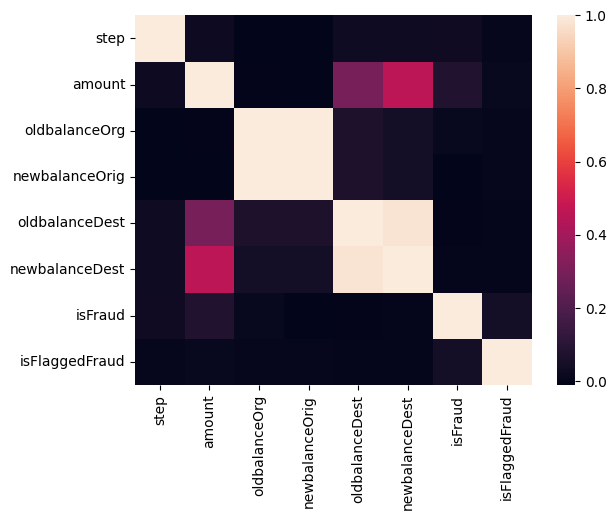

In [ ]:
sns.heatmap(df.corr() )

In [ ]:
!pip install ydata-profiling[notebook]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3d8fd4129bd65c3ca7684a97c1e1234b1df44b2765b26fa5a81ebf78795abac7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seab

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")


In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


- Most of the variables are not correlated.

- oldbalance origin and newbalanceorigin are correlated as expected as it is just add/subtract from the bank balance.

- similarly for the destination balances as well.

- This would remove the need for PCA as the dimension is relatively small and PCA will remove the original feature knowledge (domain knowledge) and it will be practically impossible to define insights based on the original attributes.

- Dont delete any of the columns as there is no explicit correlation between unrelated variables

In [ ]:
df.skew()

<ipython-input-26-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


step                0.38
amount             30.99
oldbalanceOrg       5.25
newbalanceOrig      5.18
oldbalanceDest     19.92
newbalanceDest     19.35
isFraud            27.78
isFlaggedFraud    630.60
dtype: float64

- Data is positively skewed.

Log transformation

- The log transformation is a relatively strong transformation.  Because certain measurements in nature are naturally log-normal, it is often a successful transformation for certain data sets.  

Box–Cox transformation

- The Box–Cox procedure is similar in concept to the Tukey Ladder of Power procedure.  However, instead of transforming a single variable, it maximizes a log-likelihood statistic for a linear model (such as ANOVA or linear regression).  It will also work on a single variable using a formula of x ~ 1.


In [ ]:
!pip install scipy
from scipy import stats
import scipy.stats as stats
from scipy.special import boxcox1p

In [ ]:
skew_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_logs = df[skew_cols]
df_boxcox = df[skew_cols]

In [ ]:
for i in skew_cols:
  df_logs.loc[:,i] = np.log(df_logs[i]+1)
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)

<ipython-input-29-b4f97ee14370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs.loc[:,i] = np.log(df_logs[i]+1)
<ipython-input-29-b4f97ee14370>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)
<ipython-input-29-b4f97ee14370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
df_logs.skew()

amount           -0.56
oldbalanceOrg    -0.26
newbalanceOrig    0.44
oldbalanceDest   -0.21
newbalanceDest   -0.39
dtype: float32

In [ ]:
df_boxcox.skew()

amount           -0.08
oldbalanceOrg     0.34
newbalanceOrig    0.74
oldbalanceDest   -0.04
newbalanceDest   -0.20
dtype: float32

- Now skewness is between 0 and 1

- boxcox transformation for amount, oldbalanceDest, newbalanceDest

- log transformation for oldbalanceOrg, newbalanceOrg

In [ ]:
df = pd.concat([df[['step','type','nameOrig', 'nameDest','isFraud', 'isFlaggedFraud']],df_logs[['oldbalanceOrg','newbalanceOrig']], df_boxcox[['amount','oldbalanceDest','newbalanceDest']]], axis=1, join='inner')
print(df.shape)
df.head()

(6362620, 11)


step      type     nameOrig     nameDest  isFraud  isFlaggedFraud  \
0     1   PAYMENT  C1231006815  M1979787155        0               0   
1     1   PAYMENT  C1666544295  M2044282225        0               0   
2     1  TRANSFER  C1305486145   C553264065        1               0   
3     1  CASH_OUT   C840083671    C38997010        1               0   
4     1   PAYMENT  C2048537720  M1230701703        0               0   

   oldbalanceOrg  newbalanceOrig  amount  oldbalanceDest  newbalanceDest  
0          12.04           11.98   15.08            0.00             0.0  
1           9.96            9.87   11.24            0.00             0.0  
2           5.20            0.00    6.83            0.00             0.0  
3           5.20            0.00    6.83           17.08             0.0  
4          10.63           10.31   15.51            0.00             0.0

In [ ]:
df[df.isFraud == 1].tail(40)

step      type     nameOrig     nameDest  isFraud  isFlaggedFraud  \
6362580   741  TRANSFER    C88849251  C1939028448        1               0   
6362581   741  CASH_OUT   C677394894  C1866259073        1               0   
6362582   741  TRANSFER  C1945606464   C625944676        1               0   
6362583   741  CASH_OUT  C1668034607  C1250722530        1               0   
6362584   741  TRANSFER   C992223106  C1366804249        1               1   
6362585   741  CASH_OUT   C312737633  C1400061387        1               0   
6362586   741  TRANSFER  C1565612524   C435734396        1               0   
6362587   741  CASH_OUT  C1597957921   C734451013        1               0   
6362588   741  TRANSFER  C1157446475  C1367473638        1               0   
6362589   741  CASH_OUT  C1235786818  C1738374799        1               0   
6362590   741  TRANSFER   C509686434  C1310143791        1               0   
6362591   741  CASH_OUT   C919525792   C993635374        1               0   
6362592   741  TRANSFER   C457476945  C1688658215        1               0   
6362593   741  CASH_OUT   C369315575  C2069429837        1               0   
6362594   741  TRANSFER    C31496887  C1251365829        1               0   
6362595   741  CASH_OUT  C1092829426   C716019997        1               0   
6362596   741  TRANSFER  C1112979339  C2114078084        1               0   
6362597   741  CASH_OUT  C1706094385  C2109905271        1               0   
6362598   742  TRANSFER  C1044665079   C750074708        1               0   
6362599   742  CASH_OUT  C1970706589   C637394241        1               0   
6362600   742  TRANSFER    C40604503  C1166857907        1               0   
6362601   742  CASH_OUT  C1614818636   C362803701        1               0   
6362602   742  TRANSFER  C2089752665   C112833674        1               0   
6362603   742  CASH_OUT  C1039979813  C2078394828        1               0   
6362604   742  TRANSFER  C1674778854  C1930074465        1               0   
6362605   742  CASH_OUT    C43545501   C830041824        1               0   
6362606   742  TRANSFER   C959102961   C114421319        1               0   
6362607   742  CASH_OUT  C1148860488   C846260566        1               0   
6362608   742  TRANSFER  C1226129332  C1744173808        1               0   
6362609   742  CASH_OUT  C1113162093   C797688696        1               0   
6362610   742  TRANSFER   C778071008  C1812552860        1               0   
6362611   742  CASH_OUT   C994950684  C1662241365        1               0   
6362612   743  TRANSFER  C1531301470  C1470998563        1               0   
6362613   743  CASH_OUT  C1436118706  C1240760502        1               0   
6362614   743  TRANSFER  C2013999242  C1850423904        1               0   
6362615   743  CASH_OUT   C786484425   C776919290        1               0   
6362616   743  TRANSFER  C1529008245  C1881841831        1               0   
6362617   743  CASH_OUT  C1162922333  C1365125890        1               0   
6362618   743  TRANSFER  C1685995037  C2080388513        1               0   
6362619   743  CASH_OUT  C1280323807   C873221189        1               0   

         oldbalanceOrg  newbalanceOrig  amount  oldbalanceDest  newbalanceDest  
6362580          17.06           16.57   40.12            0.00            0.00  
6362581          16.12            0.00   40.12            0.00           40.12  
6362582          16.57           15.55   40.12            0.00            0.00  
6362583          16.12            0.00   40.12           23.77           40.21  
6362584          15.55           15.55   37.36            0.00            0.00  
6362585           0.00            0.00    0.00           24.89           24.89  
6362586          11.04            0.00   20.16            0.00            0.00  
6362587          11.04            0.00   20.16           30.05           30.27  
6362588          11.65            0.00   22.04            0.00            0.00  


In [ ]:
print('The Types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']






- modify the columns to preserve this information.

- preserving customer or merchant information.

- Applied Regex to rename customer id as ‘C’ and merchant as ‘M’

In [ ]:
import re
df['nameOrig'] = df['nameOrig'].apply(lambda x: re.sub('C[A-Za-z0-9]*', 'C',x))
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('C[A-Za-z0-9]*','C',x))
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('M[A-Za-z0-9]*','M',x))
df.head()

step      type nameOrig nameDest  isFraud  isFlaggedFraud  oldbalanceOrg  \
0     1   PAYMENT        C        M        0               0          12.04   
1     1   PAYMENT        C        M        0               0           9.96   
2     1  TRANSFER        C        C        1               0           5.20   
3     1  CASH_OUT        C        C        1               0           5.20   
4     1   PAYMENT        C        M        0               0          10.63   

   newbalanceOrig  amount  oldbalanceDest  newbalanceDest  
0           11.98   15.08            0.00             0.0  
1            9.87   11.24            0.00             0.0  
2            0.00    6.83            0.00             0.0  
3            0.00    6.83           17.08             0.0  
4           10.31   15.51            0.00             0.0

- CASH_OUT and TRANSFER modes have more fraud chances.

- Onehot encoding on "nameOrig" and "nameDest" which contains "C" and "M" values. "type" is also encoded

In [ ]:
from sklearn import preprocessing

In [ ]:
ohe = preprocessing.OneHotEncoder()

In [ ]:
df= pd.get_dummies(df, columns=['type','nameOrig', 'nameDest'])
df.head(10)

step  isFraud  isFlaggedFraud  oldbalanceOrg  newbalanceOrig  amount  \
0     1        0               0          12.04           11.98   15.08   
1     1        0               0           9.96            9.87   11.24   
2     1        1               0           5.20            0.00    6.83   
3     1        1               0           5.20            0.00    6.83   
4     1        0               0          10.63           10.31   15.51   
5     1        0               0          10.89           10.74   14.51   
6     1        0               0          12.12           12.08   14.28   
7     1        0               0          12.08           12.03   14.52   
8     1        0               0           7.89            0.00   12.93   
9     1        0               0          10.64           10.50   13.59   

   oldbalanceDest  newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0            0.00            0.00             0              0           0   
1            0.00            0.00             0              0           0   
2            0.00            0.00             0              0           0   
3           17.08            0.00             0              1           0   
4            0.00            0.00             0              0           0   
5            0.00            0.00             0              0           0   
6            0.00            0.00             0              0           0   
7            0.00            0.00             0              0           0   
8            0.00            0.00             0              0           0   
9           18.99           18.88             0              0           1   

   type_PAYMENT  type_TRANSFER  nameOrig_C  nameDest_C  nameDest_M  
0             1              0           1           0           1  
1             1              0           1           0           1  
2             0              1           1           1           0  
3             0              0           1           1           0  
4             1              0           1           0           1  
5             1              0           1           0           1  
6             1              0           1           0           1  
7             1              0           1           0           1  
8             1              0           1           0           1  
9             0              0           1           1           0

In [ ]:
print(len(df.columns))
df.columns

16


Index(['step', 'isFraud', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig',
       'amount', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'nameOrig_C', 'nameDest_C', 'nameDest_M'],
      dtype='object')

In [ ]:
df.to_csv("/content/drive/MyDrive/C&R/preprocessed.csv")

# **Define Features and Target**

- based on EDA and analysis, we define the features and the target feature.

In [ ]:
features = ['step', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig',
       'amount', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'nameOrig_C', 'nameDest_C', 'nameDest_M']
target=['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split , KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn. preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[features],df['isFraud'], test_size=0.2, random_state=42)

In [ ]:
len(x_train), len(x_test)

(5090096, 1272524)

In [ ]:
y_train.value_counts()

0    5083503
1       6593
Name: isFraud, dtype: int64

In [ ]:
y_test.value_counts()

0    1270904
1       1620
Name: isFraud, dtype: int64

- Class imbalance in y_train. Need to employ sampling on training data.

In [ ]:
print(x_train.shape, y_train.shape)

(5090096, 15) (5090096,)


In [ ]:
# oversampling to increase size of rare samples
# undersampling to reduce abundant class
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

Under-sampling


Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.



Over-sampling


On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique)

Note that there is no absolute advantage of one resampling method over another. Application of these two methods depends on the use case it applies to and the dataset itself. A combination of over- and under-sampling is often successful as well.

In [ ]:
#rare class is sampled to 0.025 times the abundant class
#abundant class undersampled to twice the rare class
over = SMOTE(sampling_strategy=0.025)
under=RandomUnderSampler(random_state=42, sampling_strategy=0.5)
steps = [('o', over),('u', under)]
pipeline = Pipeline(steps=steps)
x_res, y_res = pipeline.fit_resample(x_train[features], y_train)
print(Counter(y_res))

Counter({0: 254174, 1: 127087})


In [ ]:
print(x_res.shape , y_res.shape)

(381261, 15) (381261,)


In [ ]:
print(x_test.shape , y_test.shape)

(1272524, 15) (1272524,)


# Model fitting - experimentation

In this dataset, Recall is of higher importance compared to Accuracy.
Recall is more important because it is directly tied to business KPI which is minimizing the financial loss and catching fraud.

In general, Tree based models have a higher recall. So lets start with them

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, cross_validate

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    """Plots a confusion matrix for a given model's predictions.

    Args:
        y_true (array-like): True labels for test.
        y_pred (array-like): Predicted labels.
        model_name (str, optional): Name of the model to display in the title. Defaults to "Model".
    """

    fig, ax = plt.subplots(figsize=(8, 8))
    cm = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
    cm.ax_.set_title(f"Confusion Matrix for {model_name}")
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, y_true, y_pred, class_name="Class"):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + class_name)
    plt.legend(loc="lower right")
    plt.show()


## DecisionTreeClassifier


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                              max_depth = 48,
                              max_features = 'sqrt')

In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_metrics = cross_validate(dt_model, x_res, y_res, scoring=["accuracy", "precision", "recall", "f1"],
                              n_jobs=-1, cv=kf, verbose=0)

# Print out cross-validation results
print("Cross-validation Results:")
print("Accuracy:", np.mean(val_metrics['test_accuracy']), "±", np.std(val_metrics['test_accuracy']))
print("Precision:", np.mean(val_metrics['test_precision']), "±", np.std(val_metrics['test_precision']))
print("Recall:", np.mean(val_metrics['test_recall']), "±", np.std(val_metrics['test_recall']))
print("F1 Score:", np.mean(val_metrics['test_f1']), "±", np.std(val_metrics['test_f1']))

Cross-validation Results:
Accuracy: 0.9917458088831843 ± 0.0006874366730340296
Precision: 0.9863910214112899 ± 0.0012145630431628215
Recall: 0.9888831431904872 ± 0.0009018444178966735
F1 Score: 0.9876354007190453 ± 0.0010185220643417143


In [ ]:
dt_model.fit(x_res, y_res)

DecisionTreeClassifier(max_depth=48, max_features='sqrt')

In [ ]:
score = dt_model.score(x_test,y_test)
dt_model_predictions = dt_model.predict(x_test)
score, dt_model_predictions

(0.9943223074771085, array([0, 0, 0, ..., 0, 0, 0], dtype=int32))

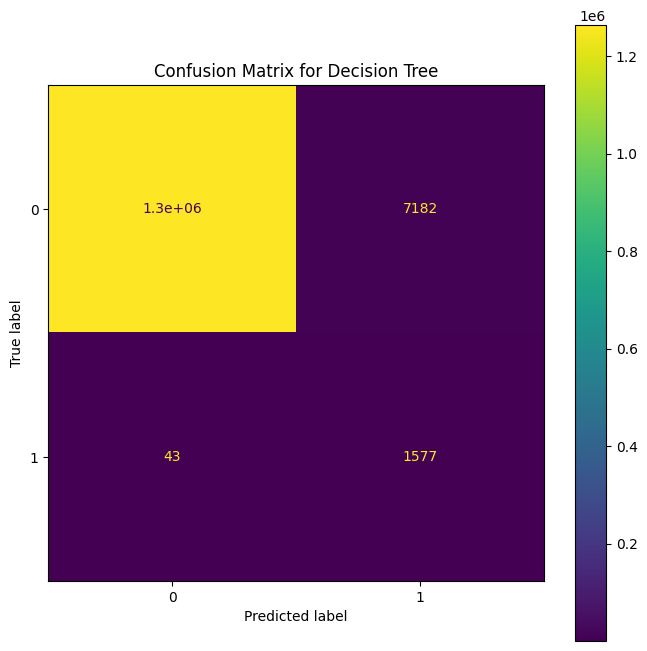

In [ ]:
plot_confusion_matrix(y_test, dt_model_predictions, model_name="Decision Tree")


In [ ]:
c_r_1 = (classification_report(y_test, dt_model_predictions, digits=4))
print(c_r_1)

              precision    recall  f1-score   support

           0     1.0000    0.9943    0.9971   1270904
           1     0.1800    0.9735    0.3039      1620

    accuracy                         0.9943   1272524
   macro avg     0.5900    0.9839    0.6505   1272524
weighted avg     0.9989    0.9943    0.9963   1272524



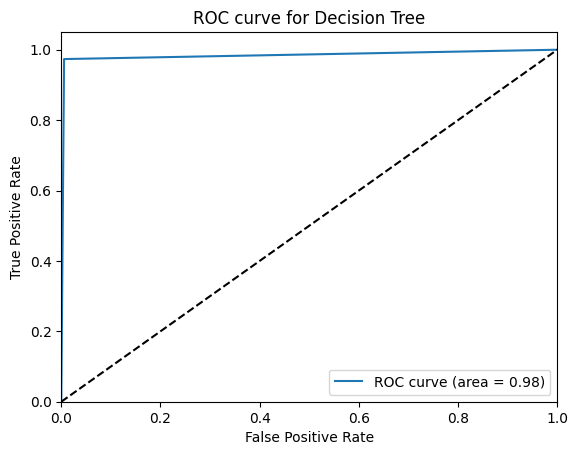

In [ ]:
plot_roc_curve(dt_model, y_test, dt_model_predictions, class_name="Decision Tree")


### Random Forest Classifier

In [ ]:
# Random Forest Classifier
#hyperparameter code given at the end. These were chosen based on Optuna and prior experiences in ML and Data Science.

rf_model = RandomForestClassifier(criterion = 'gini',
                              max_depth = 48,
                              max_features = 'sqrt',
                              n_estimators = 300)

In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_metrics = cross_validate(rf_model, x_res, y_res, scoring=["accuracy", "precision", "recall", "f1"],
                              n_jobs=-1, cv=kf, verbose=0)

# Print out cross-validation results
print("Cross-validation Results:")
print("Accuracy:", np.mean(val_metrics['test_accuracy']), "±", np.std(val_metrics['test_accuracy']))
print("Precision:", np.mean(val_metrics['test_precision']), "±", np.std(val_metrics['test_precision']))
print("Recall:", np.mean(val_metrics['test_recall']), "±", np.std(val_metrics['test_recall']))
print("F1 Score:", np.mean(val_metrics['test_f1']), "±", np.std(val_metrics['test_f1']))

Cross-validation Results:
Accuracy: 0.9967266513189056 ± 0.0002168673022236162
Precision: 0.9927250441800158 ± 0.0002162001466579738
Recall: 0.9974904149343684 ± 0.0004427638308985879
F1 Score: 0.9951020055250019 ± 0.0003193956243024848


In [ ]:


rf_model.fit(x_res, y_res)

rf_predictions = rf_model.predict(x_test)

score = rf_model.score(x_test,y_test)
score

0.9962617600925405

In [ ]:
c_r_2 = (classification_report(y_test, rf_predictions, digits=4))
print(c_r_2)

              precision    recall  f1-score   support

           0     1.0000    0.9963    0.9981   1270904
           1     0.2524    0.9870    0.4020      1620

    accuracy                         0.9963   1272524
   macro avg     0.6262    0.9917    0.7001   1272524
weighted avg     0.9990    0.9963    0.9974   1272524



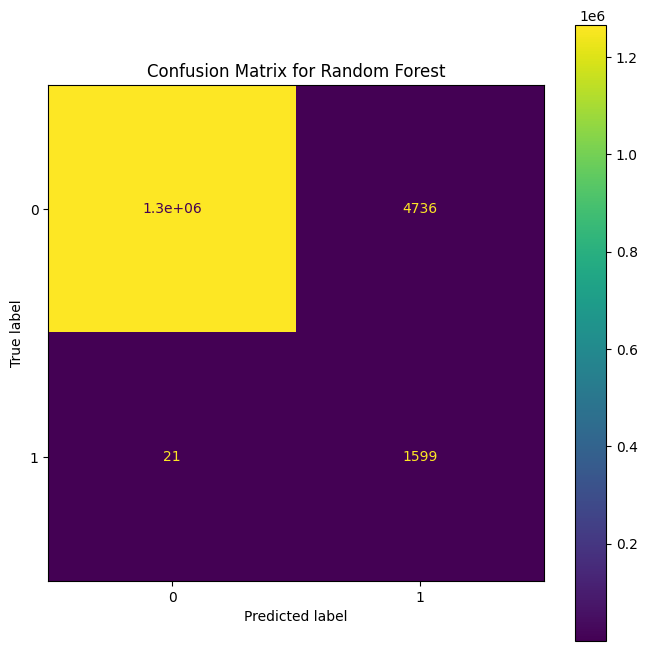

In [ ]:
plot_confusion_matrix(y_test, rf_predictions, model_name="Random Forest")

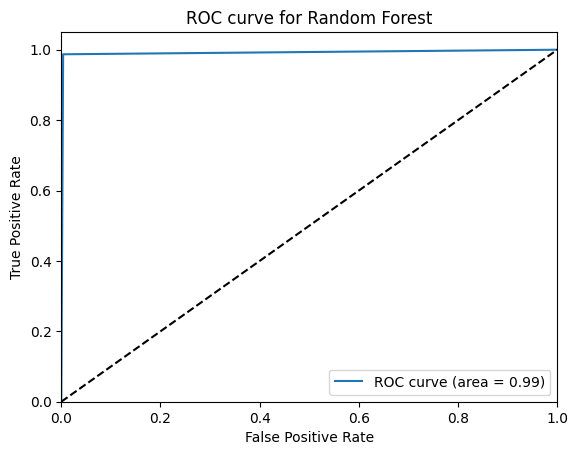

In [ ]:
plot_roc_curve(rf_model, y_test, rf_predictions, class_name="Random Forest")


### Logistic Regression

In [ ]:
lr_model = LogisticRegression(C=0.25,
                         solver = "liblinear")

In [ ]:
# hyperparameters picked after 10 trials of optuna.
# Optuna code is removed while cleaning. Base code is commented out. Base code contains the Optuna code for Random forest

In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_metrics = cross_validate(lr_model, x_res, y_res, scoring=["accuracy", "precision", "recall", "f1"],
                              n_jobs=-1, cv=kf, verbose=0)

# Print out cross-validation results
print("Cross-validation Results:")
print("Accuracy:", np.mean(val_metrics['test_accuracy']), "±", np.std(val_metrics['test_accuracy']))
print("Precision:", np.mean(val_metrics['test_precision']), "±", np.std(val_metrics['test_precision']))
print("Recall:", np.mean(val_metrics['test_recall']), "±", np.std(val_metrics['test_recall']))
print("F1 Score:", np.mean(val_metrics['test_f1']), "±", np.std(val_metrics['test_f1']))

Cross-validation Results:
Accuracy: 0.971526067264963 ± 0.0002574633647044436
Precision: 0.9437712998817982 ± 0.001182356435164492
Recall: 0.9725238745756657 ± 0.0013462758053655098
F1 Score: 0.9579303162644758 ± 0.00031178057116145174


In [ ]:
lr_model.fit(x_res, y_res)

lr_predictions = lr_model.predict(x_test)

score = lr_model.score(x_test,y_test)
score

0.9708767771766976

In [ ]:
c_r_3 = (classification_report(y_test, lr_predictions, digits=4))
print(c_r_3)

              precision    recall  f1-score   support

           0     0.9999    0.9709    0.9852   1270904
           1     0.0403    0.9586    0.0773      1620

    accuracy                         0.9709   1272524
   macro avg     0.5201    0.9648    0.5313   1272524
weighted avg     0.9987    0.9709    0.9840   1272524



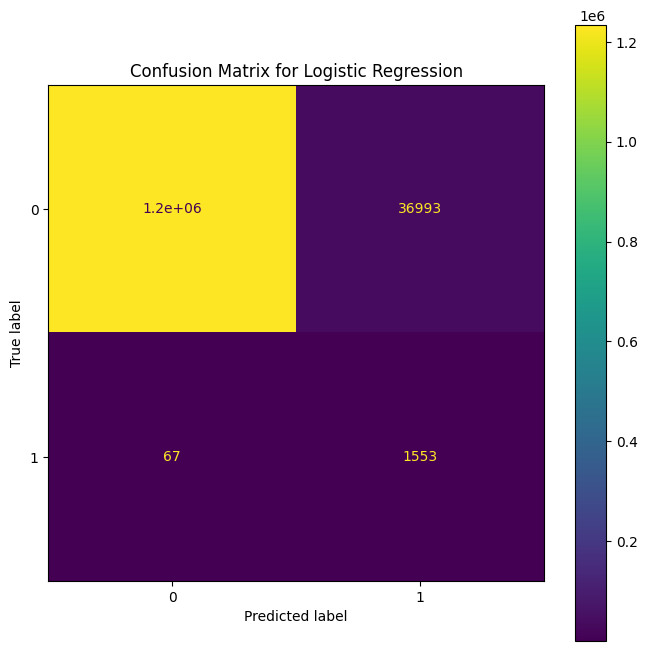

In [ ]:
plot_confusion_matrix(y_test, lr_predictions, model_name="Logistic Regression")

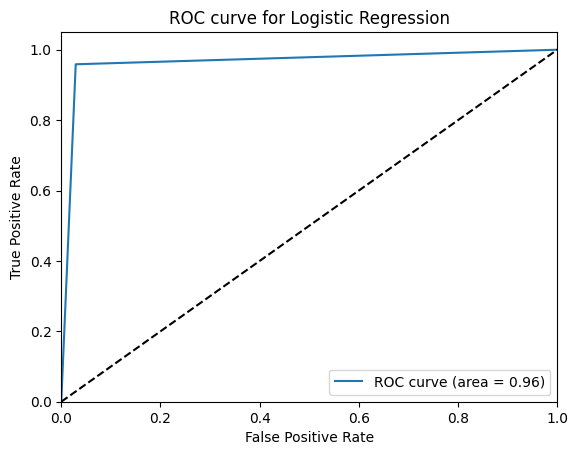

In [ ]:
plot_roc_curve(lr_model, y_test, lr_predictions, class_name="Logistic Regression")

### XGBoost

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

xg_model = XGBClassifier()
print(xg_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_metrics = cross_validate(xg_model, x_res, y_res, scoring=["accuracy", "precision", "recall", "f1"],
                              n_jobs=-1, cv=kf, verbose=0)

# Print out cross-validation results
print("Cross-validation Results:")
print("Accuracy:", np.mean(val_metrics['test_accuracy']), "±", np.std(val_metrics['test_accuracy']))
print("Precision:", np.mean(val_metrics['test_precision']), "±", np.std(val_metrics['test_precision']))
print("Recall:", np.mean(val_metrics['test_recall']), "±", np.std(val_metrics['test_recall']))
print("F1 Score:", np.mean(val_metrics['test_f1']), "±", np.std(val_metrics['test_f1']))

Cross-validation Results:
Accuracy: 0.9971515571402838 ± 0.00016721470837433527
Precision: 0.9938079309445353 ± 0.00030778341408662513
Recall: 0.9976717640924363 ± 0.0003212632834259902
F1 Score: 0.995736058667734 ± 0.0002419023248409844


In [ ]:

xg_model.fit(x_res, y_res)

xg_predictions = xg_model.predict(x_test)

score = xg_model.score(x_test,y_test)
score


0.9969202938412164

In [ ]:
c_r_4 = (classification_report(y_test, xg_predictions, digits=4))
print(c_r_4)

              precision    recall  f1-score   support

           0     1.0000    0.9969    0.9985   1270904
           1     0.2918    0.9944    0.4512      1620

    accuracy                         0.9969   1272524
   macro avg     0.6459    0.9957    0.7248   1272524
weighted avg     0.9991    0.9969    0.9978   1272524



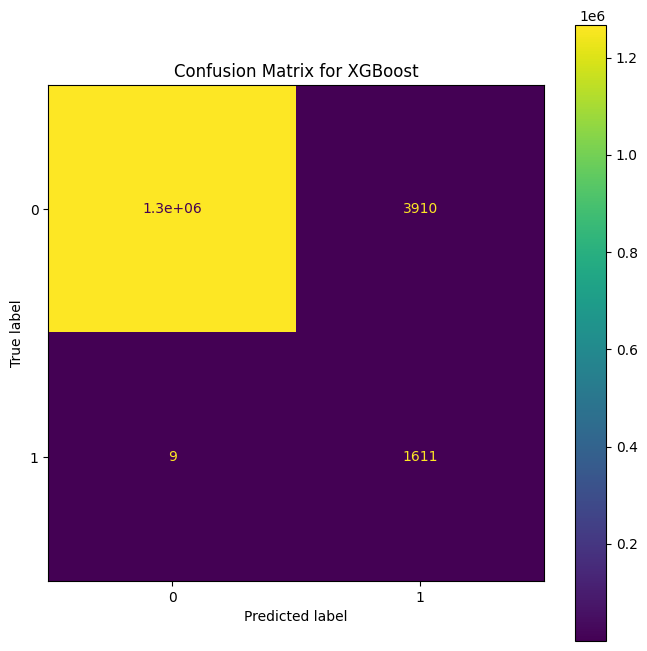

In [ ]:
plot_confusion_matrix(y_test, xg_predictions, model_name="XGBoost")

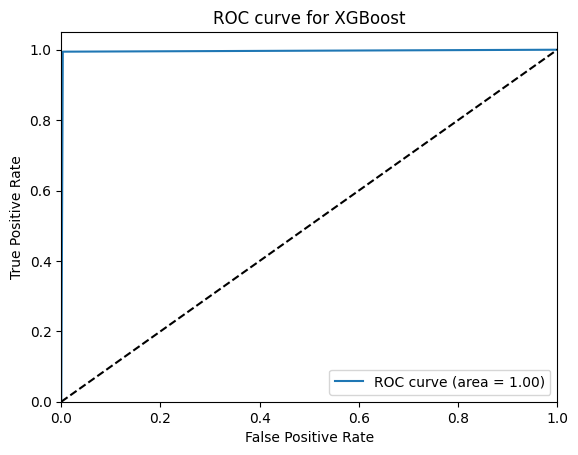

In [ ]:
plot_roc_curve(xg_model, y_test, xg_predictions, class_name="XGBoost")

### Bagging Classifier

In [ ]:
base_estimator = DecisionTreeClassifier()

bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100)

print(bagging_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)


In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_metrics = cross_validate(bagging_model, x_res, y_res, scoring=["accuracy", "precision", "recall", "f1"],
                              n_jobs=-1, cv=kf, verbose=0)

# Print out cross-validation results
print("Cross-validation Results:")
print("Accuracy:", np.mean(val_metrics['test_accuracy']), "±", np.std(val_metrics['test_accuracy']))
print("Precision:", np.mean(val_metrics['test_precision']), "±", np.std(val_metrics['test_precision']))
print("Recall:", np.mean(val_metrics['test_recall']), "±", np.std(val_metrics['test_recall']))
print("F1 Score:", np.mean(val_metrics['test_f1']), "±", np.std(val_metrics['test_f1']))

Cross-validation Results:
Accuracy: 0.9969391047627498 ± 0.00020960012540236552
Precision: 0.9939438817194162 ± 0.00036338761426145643
Recall: 0.9968922478659067 ± 0.00028830936527501634
F1 Score: 0.9954158677895549 ± 0.00030654427924401356


In [ ]:
# Train the classifier on the training set
bagging_model.fit(x_res, y_res)
bagging_predictions = bagging_model.predict(x_test)

score = bagging_model.score(x_test,y_test)
score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9969572283116075

In [ ]:
c_r_5 = (classification_report(y_test, bagging_predictions, digits=4))
print(c_r_5)

              precision    recall  f1-score   support

           0     1.0000    0.9970    0.9985   1270904
           1     0.2945    0.9957    0.4545      1620

    accuracy                         0.9970   1272524
   macro avg     0.6472    0.9963    0.7265   1272524
weighted avg     0.9991    0.9970    0.9978   1272524



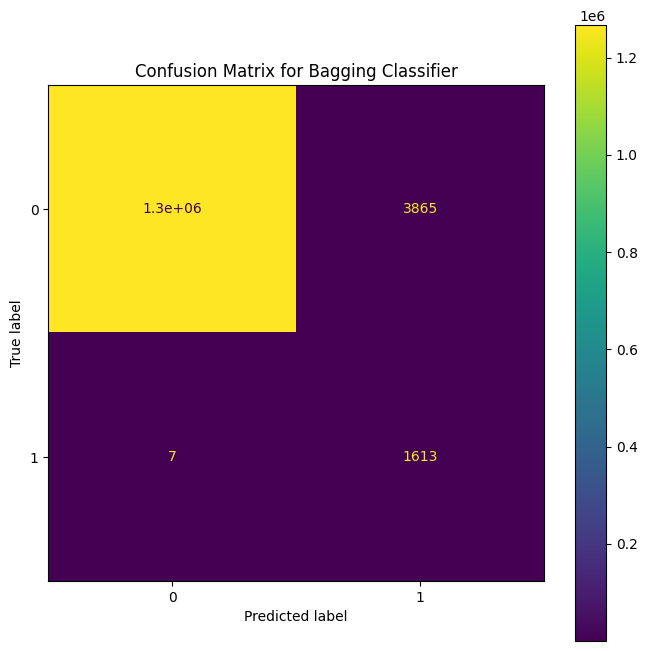

In [ ]:
plot_confusion_matrix(y_test, bagging_predictions, model_name="Bagging Classifier")

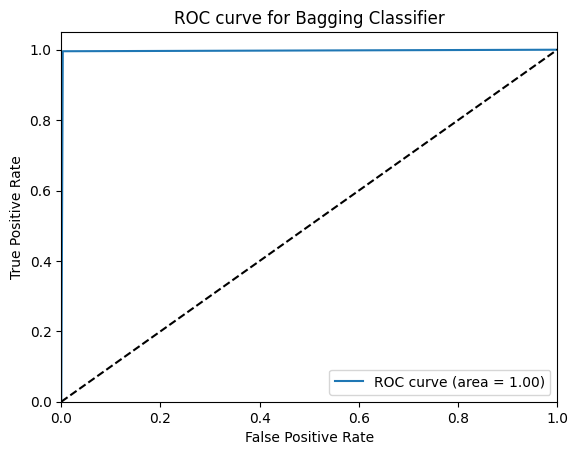

In [ ]:
plot_roc_curve(bagging_model, y_test, bagging_predictions, class_name="Bagging Classifier")

Feature: 0, Score: 0.00364
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.05642
Feature: 3, Score: 0.74836
Feature: 4, Score: 0.02228
Feature: 5, Score: 0.00106
Feature: 6, Score: 0.01153
Feature: 7, Score: 0.00231
Feature: 8, Score: 0.00692
Feature: 9, Score: 0.00330
Feature: 10, Score: 0.12746
Feature: 11, Score: 0.01671
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000


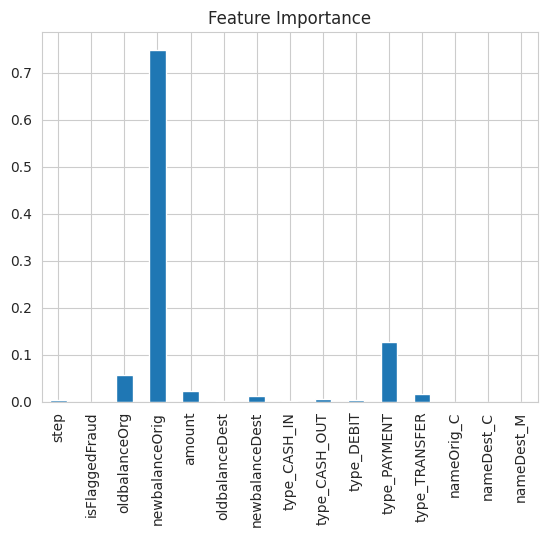

In [ ]:


# Get feature importances from the XGBoost model
importance = xg_model.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Match feature importance scores with feature labels
feature_dict = dict(zip(x_res.columns, importance))

# Plot feature importance
sns.set_style('whitegrid')
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()


Feature: 0, Score: 0.00469
Feature: 1, Score: 0.99975
Feature: 2, Score: 2.67010
Feature: 3, Score: -0.72898
Feature: 4, Score: -0.29029
Feature: 5, Score: 0.00374
Feature: 6, Score: -0.18256
Feature: 7, Score: -6.45344
Feature: 8, Score: 0.85565
Feature: 9, Score: -0.37118
Feature: 10, Score: -5.54170
Feature: 11, Score: 0.99480
Feature: 12, Score: -10.51586
Feature: 13, Score: -4.97416
Feature: 14, Score: -5.54170


<Axes: title={'center': 'Feature Importance'}>

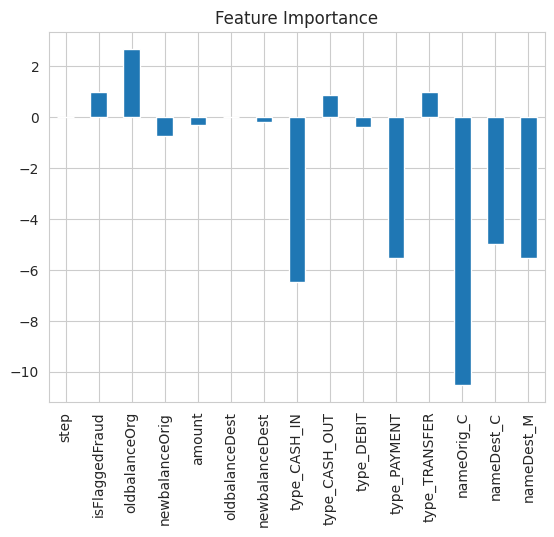

In [ ]:
lr_model = LogisticRegression(C=0.21,
                         solver = "liblinear")
lr_model.fit(x_train, y_train);
lr_model.coef_
# get importance
importance = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# match for labels
feature_dict = dict(zip(x_res.columns, list(lr_model.coef_[0])))
feature_dict
sns.set_style('whitegrid')
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

### **Appendix**

In [ ]:
# !pip install optuna
# import optuna
# optuna.__version__

Sample code for Hyperparameter Tuning using Optuna. The code is commented out to ensure colab/jupyter doesnt crash. The same code can be utilized for other models with parameter and model name changes.

# **WARNING**: Using Optuna or GridsearchCV will take a lot of time. Approximately 3 hours per model.

In [ ]:
# from sklearn.metrics import recall_score

# # Define possible values for max_features
# possible_max_features = ["sqrt", "log2", None]

# def objective(trial):
#     n_estimators = trial.suggest_int("n_estimators", 100, 500)
#     max_depth = trial.suggest_int("max_depth", 2, 50)

#     # Sample index of possible_max_features
#     max_features_idx = trial.suggest_int("max_features_idx", 0, len(possible_max_features) - 1)
#     max_features = possible_max_features[max_features_idx]

#     model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
#     model.fit(x_res, y_res)

#     predictions = model.predict(x_test)
#     recall = recall_score(y_test, predictions)

#     return recall
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)
